In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
print(red_wine.info())
print(red_wine.head())
print(red_wine.duplicated().sum())
red_wine = red_wine.drop_duplicates()
#red_wine = red_wine.reset_index(drop=True
#red_wine.reset_index(drop=True)
print(red_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

# Research question: can wine quality be predicted based on the chemical compounds ? If so, which compounds have the highest predictive quality ?

In [4]:
print(round(red_wine.describe(),2))
print(sorted(red_wine['quality'].unique()))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1359.00           1359.00      1359.00         1359.00   
mean            8.31              0.53         0.27            2.52   
std             1.74              0.18         0.20            1.35   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.43            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1359.00              1359.00               1359.00  1359.00  1359.00   
mean        0.09                15.89                 46.83     1.00     3.31   
std         0.05                10.45                 33.41     0.00     0.16   
min         0.01                 1.0

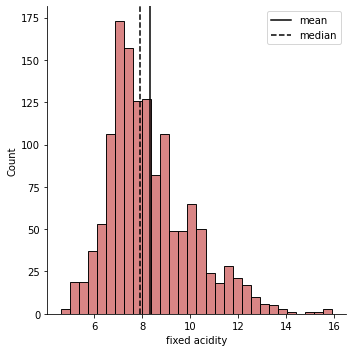

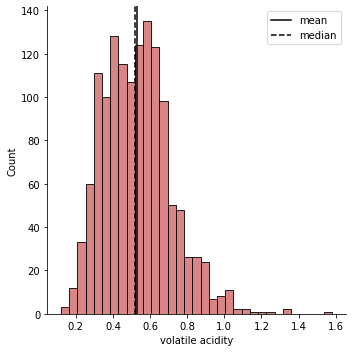

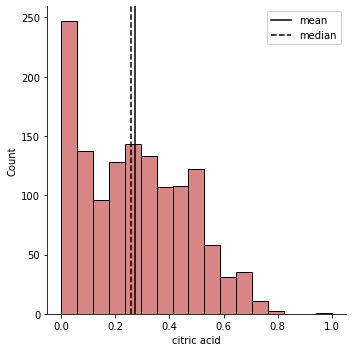

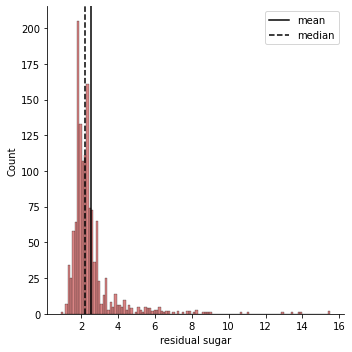

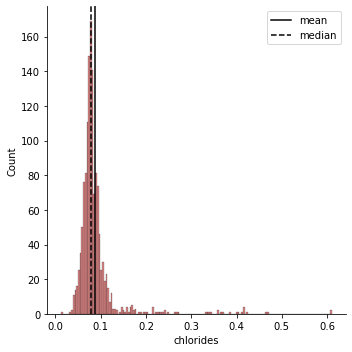

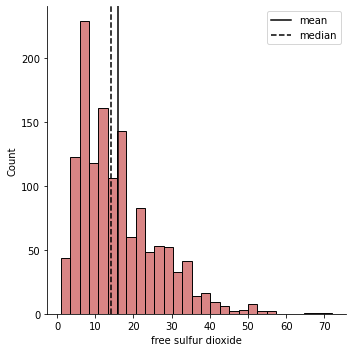

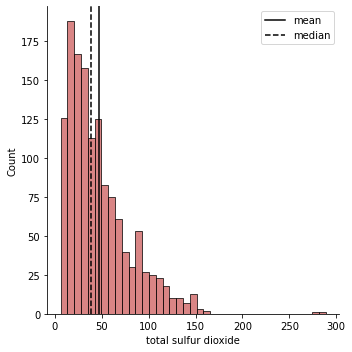

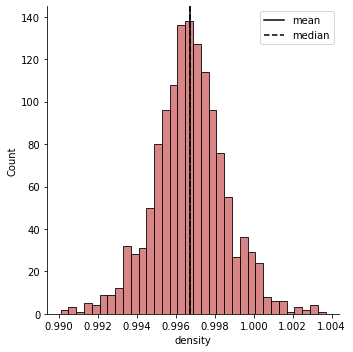

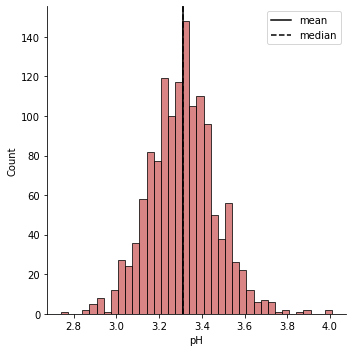

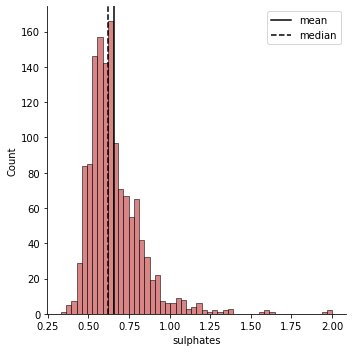

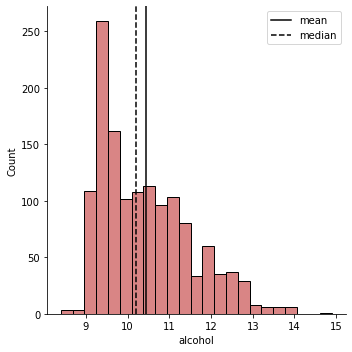

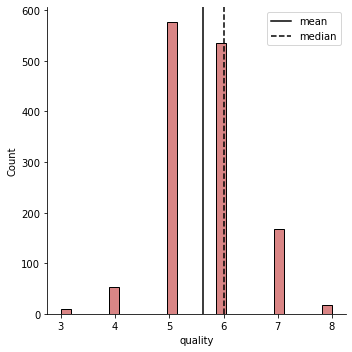

In [5]:
for column in red_wine.columns:
    sns.displot(data=red_wine, x=column, color='indianred')
    plt.axvline(x = red_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = red_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

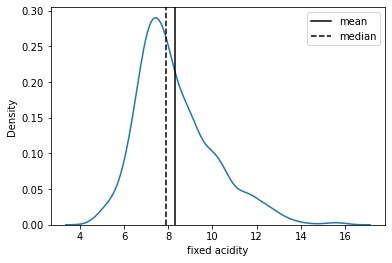

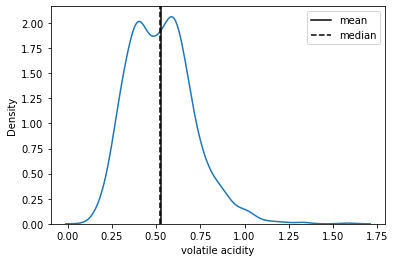

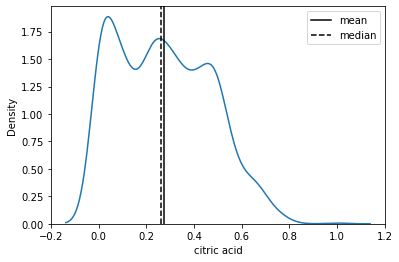

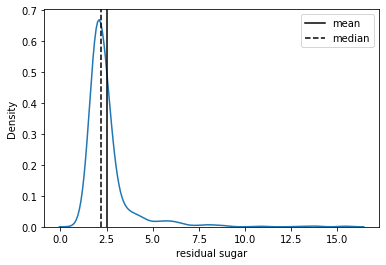

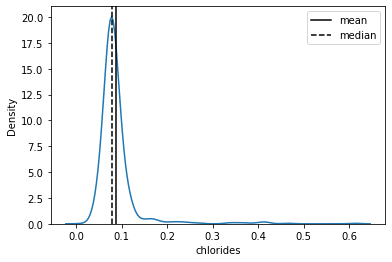

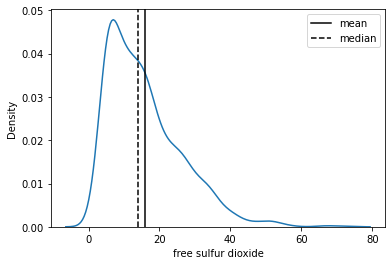

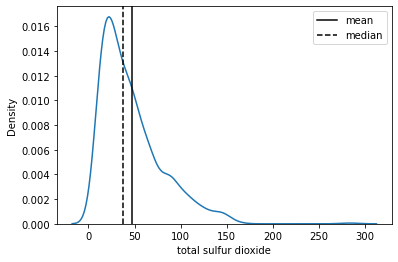

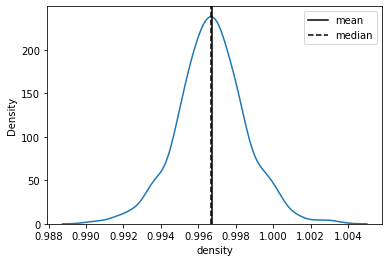

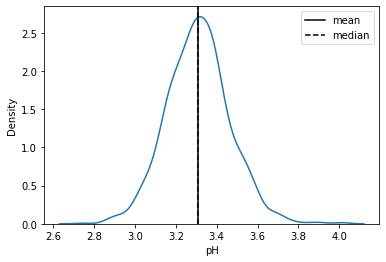

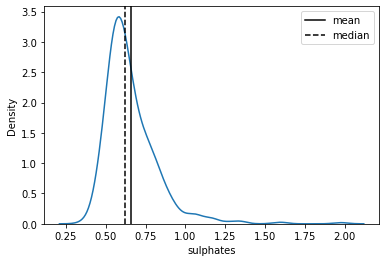

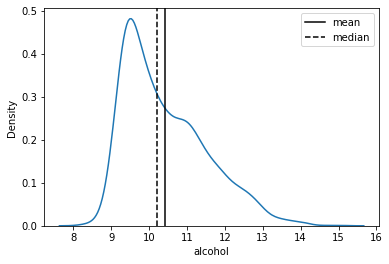

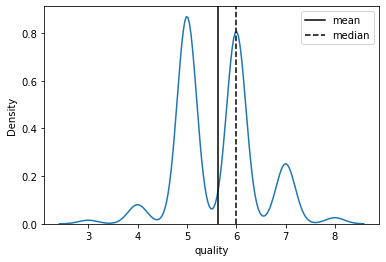

In [6]:
for column in red_wine.columns:
    plt.figure()
    sns.kdeplot(data=red_wine, x=column)
    plt.axvline(x = red_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = red_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

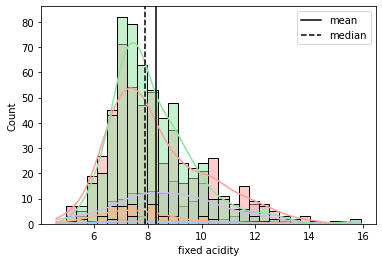

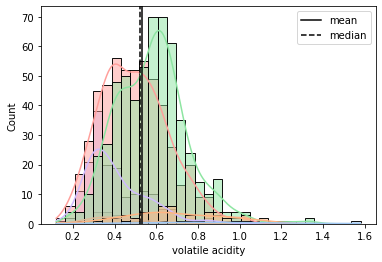

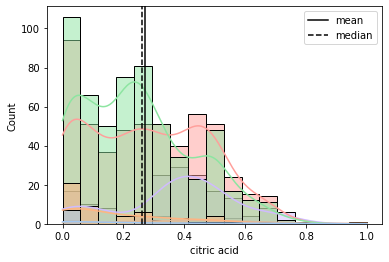

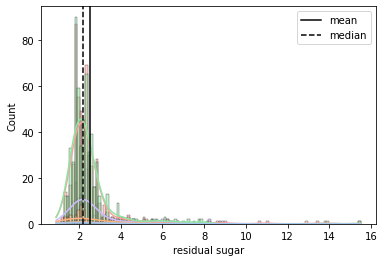

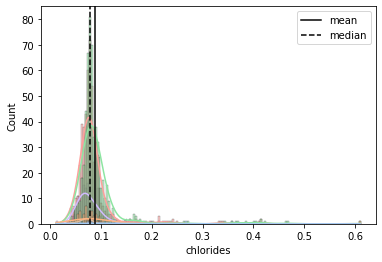

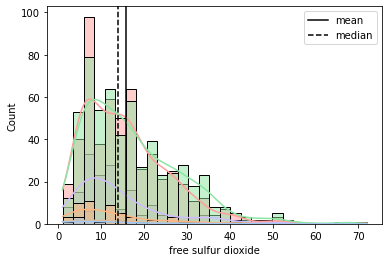

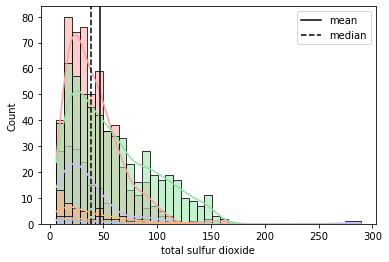

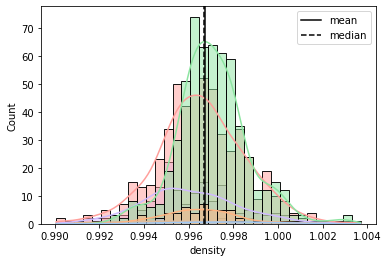

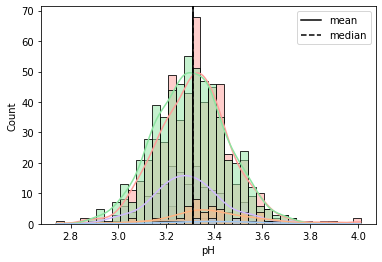

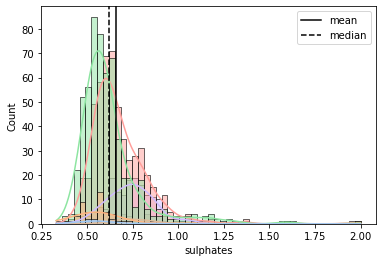

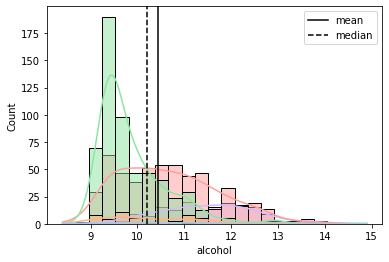

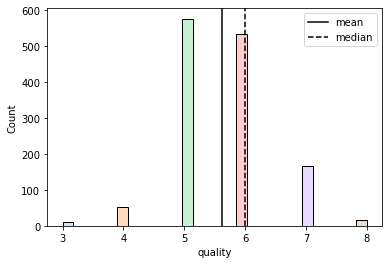

In [7]:
for column in red_wine.columns:
    plt.figure()
    sns.histplot(data=red_wine, x=column, hue='quality', kde=True, palette="pastel")
    plt.axvline(x = red_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = red_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

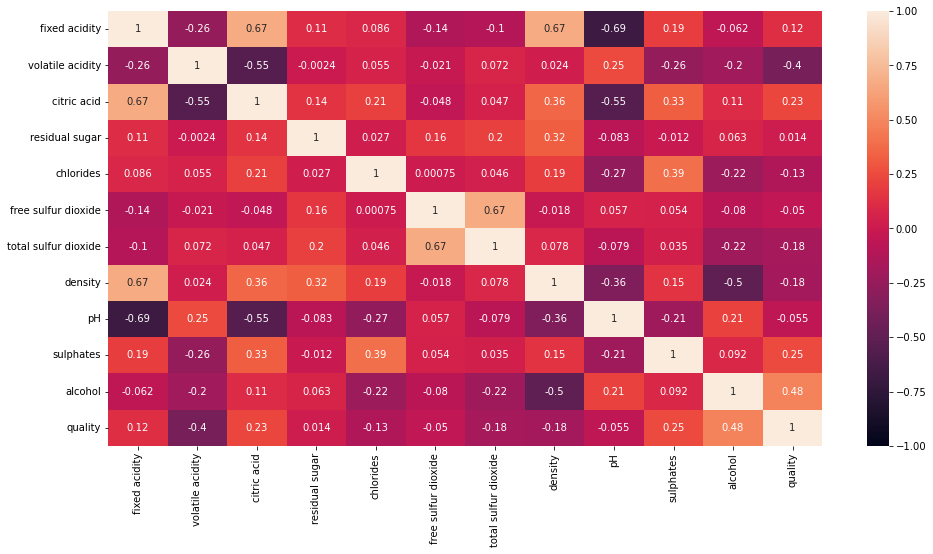

In [8]:
corr_matrix=red_wine.corr()
print(corr_matrix)
plt.figure(figsize=(16,8))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

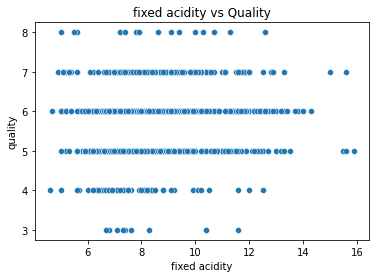

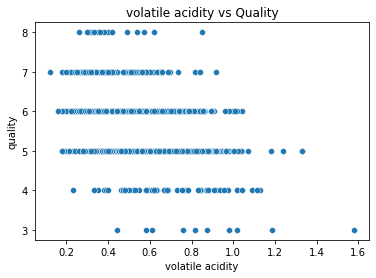

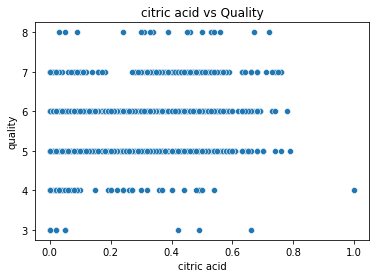

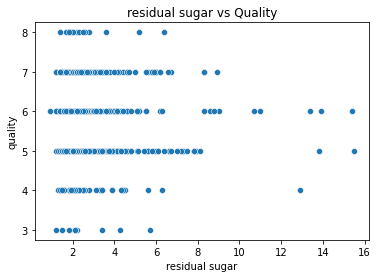

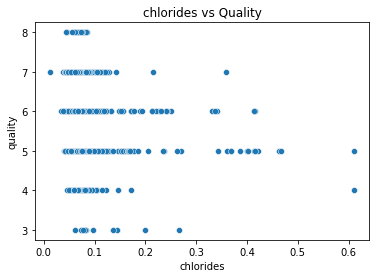

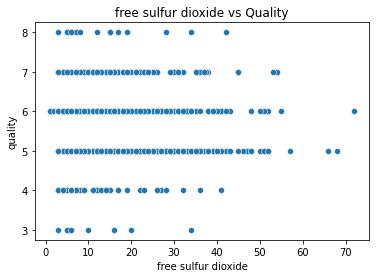

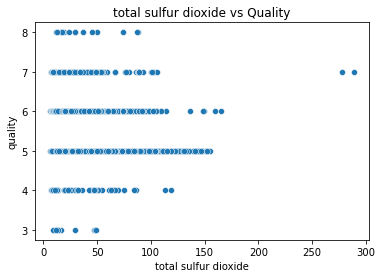

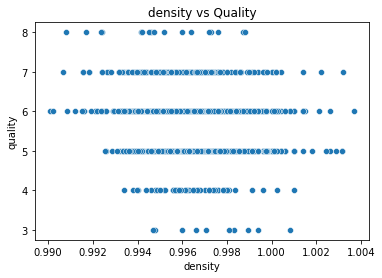

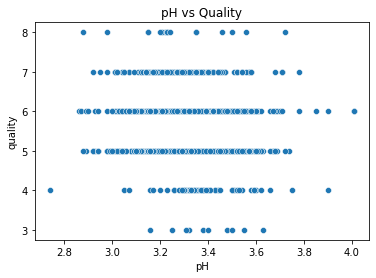

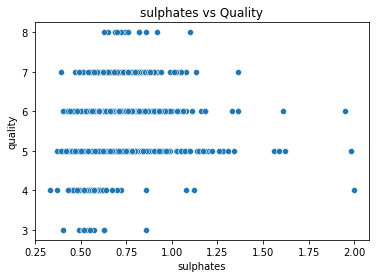

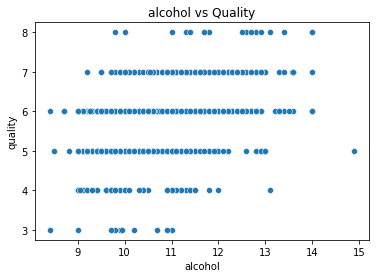

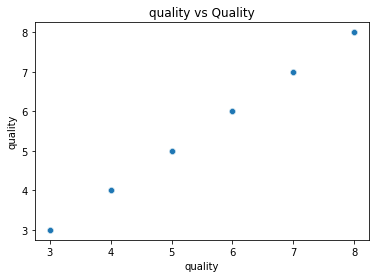

In [9]:
for column in red_wine.columns:
    sns.scatterplot(x=red_wine[column], y=red_wine['quality'])
    plt.title(f"{column} vs Quality")
    plt.show()

In [10]:
red_wines_sum = red_wine.copy(deep=True)
print(red_wines_sum.info())
red_wines_sum

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
red_wines_sum['acidity']=red_wines_sum['fixed acidity']+red_wines_sum['volatile acidity']
red_wines_sum.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,8.06


In [12]:
red_wines_sum = red_wines_sum.drop(columns=['fixed acidity', 'volatile acidity', 'citric acid'])
red_wines_sum.head()

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity
0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
5,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,8.06


In [13]:
red_wines_sum['sulphur compounds'] = red_wines_sum['total sulfur dioxide'] + red_wines_sum['sulphates']
red_wines_sum = red_wines_sum.drop(columns=['total sulfur dioxide', 'free sulfur dioxide', 'sulphates'])
red_wines_sum.head()

,residual sugar,chlorides,density,pH,alcohol,quality,acidity,sulphur compounds
0,1.9,0.076,0.9978,3.51,9.4,5,8.10,34.56
1,2.6,0.098,0.9968,3.20,9.8,5,8.68,67.68
2,2.3,0.092,0.9970,3.26,9.8,5,8.56,54.65
3,1.9,0.075,0.9980,3.16,9.8,6,11.48,60.58
5,1.8,0.075,0.9978,3.51,9.4,5,8.06,40.56


In [14]:
print(red_wines_sum.columns)

Index(['residual sugar', 'chlorides', 'density', 'pH', 'alcohol', 'quality',
       'acidity', 'sulphur compounds'],
      dtype='object')


In [15]:
arrange_columns = ['alcohol', 'acidity', 'residual sugar', 'sulphur compounds', 'chlorides', 'density', 'pH', 'quality',]
red_wines_sum = red_wines_sum[arrange_columns]
red_wines_sum.head()

,alcohol,acidity,residual sugar,sulphur compounds,chlorides,density,pH,quality
0,9.4,8.10,1.9,34.56,0.076,0.9978,3.51,5
1,9.8,8.68,2.6,67.68,0.098,0.9968,3.20,5
2,9.8,8.56,2.3,54.65,0.092,0.9970,3.26,5
3,9.8,11.48,1.9,60.58,0.075,0.9980,3.16,6
5,9.4,8.06,1.8,40.56,0.075,0.9978,3.51,5


                    alcohol   acidity  residual sugar  sulphur compounds  \
alcohol            1.000000 -0.084257        0.063281          -0.217319   
acidity           -0.084257  1.000000        0.113209          -0.097471   
residual sugar     0.063281  0.113209        1.000000           0.200939   
sulphur compounds -0.217319 -0.097471        0.200939           1.000000   
chlorides         -0.223824  0.093719        0.026656           0.047779   
density           -0.504995  0.687544        0.324522           0.078872   
pH                 0.213418 -0.675206       -0.083143          -0.080335   
quality            0.480343  0.079084        0.013640          -0.176550   

                   chlorides   density        pH   quality  
alcohol            -0.223824 -0.504995  0.213418  0.480343  
acidity             0.093719  0.687544 -0.675206  0.079084  
residual sugar      0.026656  0.324522 -0.083143  0.013640  
sulphur compounds   0.047779  0.078872 -0.080335 -0.176550  
chlorides 

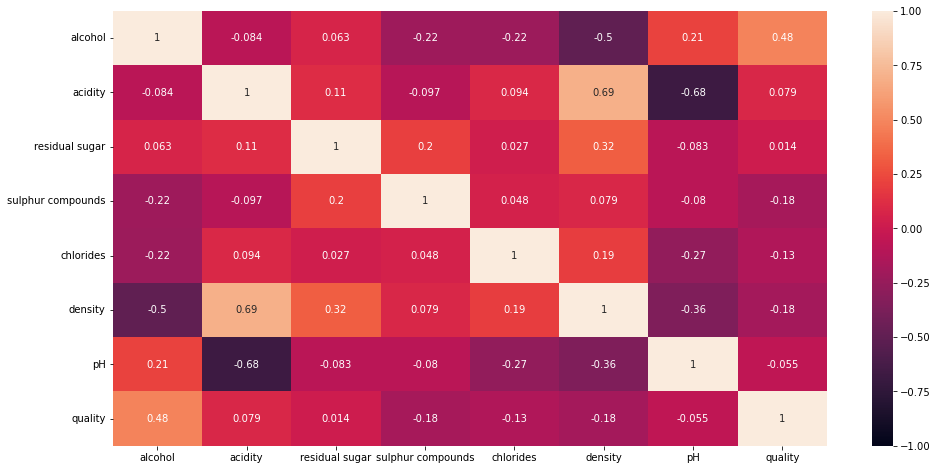

In [16]:
corr_matrix_2 =red_wines_sum.corr()
print(corr_matrix_2)
plt.figure(figsize=(16,8))

sns.heatmap(corr_matrix_2, vmin=-1, vmax=1, annot=True)
plt.show()

# Model training and fitting (all features)

In [26]:
X = red_wines_sum.drop(columns=['quality'])
y = red_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining all features: {score}')

Score with a model retaining all features: 0.46691176470588236


In [27]:
from sklearn.naive_bayes import GaussianNB

X = red_wines_sum.drop('quality', axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining all features: {score}')

Score with a model retaining all features: 0.5404411764705882


In [28]:
from sklearn.neighbors import KNeighborsClassifier

X = red_wines_sum.drop('quality', axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining all features: {score}')

Score with a model retaining all features: 0.47794117647058826


# Model training and fitting (selected features)

## Retaining density and dropping alcohol

In [20]:
X = red_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = red_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.39705882352941174


In [21]:
X = red_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.4485294117647059


In [22]:
X = red_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.3786764705882353


## Retaining alcohol and dropping density

In [23]:
X = red_wines_sum.drop(['density', 'quality'], axis=1)
y = red_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.5441176470588235


In [24]:
X = red_wines_sum.drop(['density', 'quality'], axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.5294117647058824


In [25]:
X = red_wines_sum.drop(['density', 'quality'], axis=1)
y = red_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.47794117647058826
